In [3]:
import importlib
import sys

pkgs = [
    ("numpy", "np"),
    ("PIL", "PIL"),          # from PIL import Image
    ("matplotlib", "plt"),   # import matplotlib.pyplot as plt
    ("sklearn", "sklearn"),  # scikit-learn
    ("cv2", "cv2"),          # optional
]

print(f"Python executable: {sys.executable}\n")

for mod_name, alias in pkgs:
    try:
        m = importlib.import_module(mod_name)
        ver = getattr(m, "__version__", "version attr not found")
        print(f"[OK] {mod_name} installed, version: {ver}")
    except ImportError:
        print(f"[MISSING] {mod_name} is NOT installed")


Python executable: C:\Users\Rubai\miniconda3\envs\nlp310\python.exe

[OK] numpy installed, version: 2.1.2
[OK] PIL installed, version: 11.0.0
[OK] matplotlib installed, version: 3.10.7
[OK] sklearn installed, version: 1.7.2
[OK] cv2 installed, version: 4.12.0


In [1]:
import os
import numpy as np
from PIL import Image

data_dir = "animal_dataset"
classes = ["cat", "dog", "panda"]

X = []
y = []

for label, cname in enumerate(classes):
    folder = os.path.join(data_dir, cname)
    for fname in os.listdir(folder):
        if fname.lower().endswith((".jpg",".jpeg",".png",".bmp")):
            path = os.path.join(folder, fname)

            img = Image.open(path).convert("L")
            img = img.resize((32, 32))
            arr = np.array(img, dtype="float32").flatten()

            X.append(arr)
            y.append(label)

X = np.array(X) / 255.0     # normalize 0-1
y = np.array(y)

print("X shape:", X.shape)



X shape: (300, 1024)


In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9]
metrics = ["manhattan", "euclidean"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {m: [] for m in metrics}


In [3]:
for metric in metrics:
    print("\nDistance metric:", metric)

    for k in k_values:
        fold_acc = []

        for train_idx, val_idx in skf.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            model = KNeighborsClassifier(n_neighbors=k, metric=metric)
            model.fit(X_train, y_train)

            pred = model.predict(X_val)
            acc = accuracy_score(y_val, pred)
            fold_acc.append(acc)

        mean_acc = np.mean(fold_acc)
        results[metric].append(mean_acc)

        print(f"K={k} → mean accuracy: {mean_acc:.4f}")

print("\nAll results:", results)



Distance metric: manhattan
K=1 → mean accuracy: 0.3733
K=3 → mean accuracy: 0.3733
K=5 → mean accuracy: 0.4067
K=7 → mean accuracy: 0.4333
K=9 → mean accuracy: 0.4500

Distance metric: euclidean
K=1 → mean accuracy: 0.3633
K=3 → mean accuracy: 0.3600
K=5 → mean accuracy: 0.3500
K=7 → mean accuracy: 0.4100
K=9 → mean accuracy: 0.4033

All results: {'manhattan': [np.float64(0.37333333333333335), np.float64(0.37333333333333335), np.float64(0.4066666666666666), np.float64(0.4333333333333333), np.float64(0.45)], 'euclidean': [np.float64(0.36333333333333334), np.float64(0.36), np.float64(0.35), np.float64(0.41), np.float64(0.4033333333333333)]}


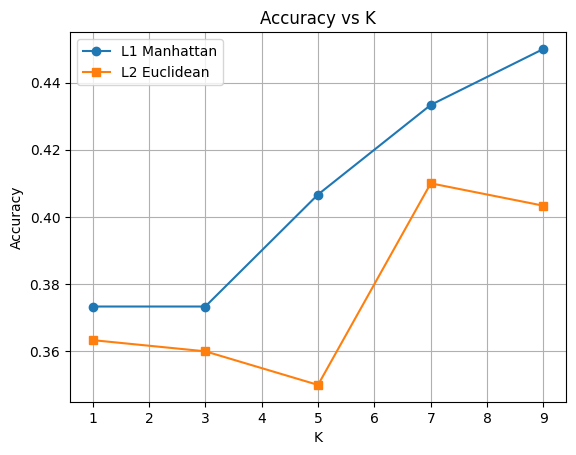

In [4]:
import matplotlib.pyplot as plt

plt.plot(k_values, results["manhattan"], marker="o", label="L1 Manhattan")
plt.plot(k_values, results["euclidean"], marker="s", label="L2 Euclidean")

plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.grid(True)
plt.legend()
plt.show()


In [5]:
best_metric = None
best_k = None
best_acc = 0

for metric in metrics:
    for i, k in enumerate(k_values):
        if results[metric][i] > best_acc:
            best_acc = results[metric][i]
            best_metric = metric
            best_k = k

print("\nBest metric:", best_metric)
print("Best K:", best_k)
print("Best accuracy:", best_acc)

final_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_model.fit(X, y)



Best metric: manhattan
Best K: 9
Best accuracy: 0.45


,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [6]:
sample_idx = [0, 1, 2, 3, 4]    # first 5 images
sample_imgs = X[sample_idx]
sample_labels = y[sample_idx]

pred = final_model.predict(sample_imgs)

for i in range(5):
    print(f"Image {i}: Predicted = {classes[pred[i]]}, True = {classes[sample_labels[i]]}")


Image 0: Predicted = cat, True = cat
Image 1: Predicted = dog, True = cat
Image 2: Predicted = cat, True = cat
Image 3: Predicted = cat, True = cat
Image 4: Predicted = dog, True = cat


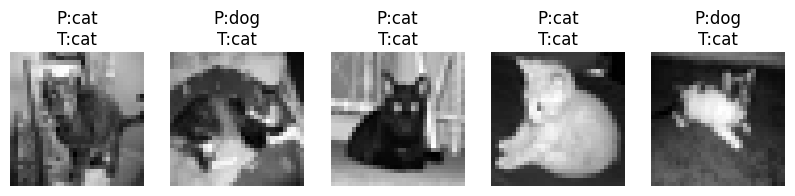

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
for i, idx in enumerate(sample_idx):
    plt.subplot(1,5,i+1)
    plt.imshow(X[idx].reshape(32,32), cmap="gray")
    plt.title(f"P:{classes[pred[i]]}\nT:{classes[sample_labels[i]]}")
    plt.axis("off")

plt.show()
